## Importing Libraries

In [843]:
import cv2
import numpy as np
import imageio as iio
from matplotlib import pyplot as plt

#### Reading the image and also making a blured version for HSV

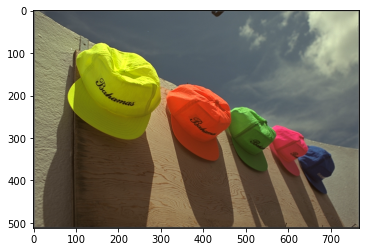

In [846]:
img = iio.imread("p4.png")

img_blur = cv2.blur(img,ksize=(9,9))
plt.imshow(img);

## HSI

<h5>
    At first I got the HSV image from blured version because it doesn't have sharp unwanted hues and it's softer so the results are really accurate.

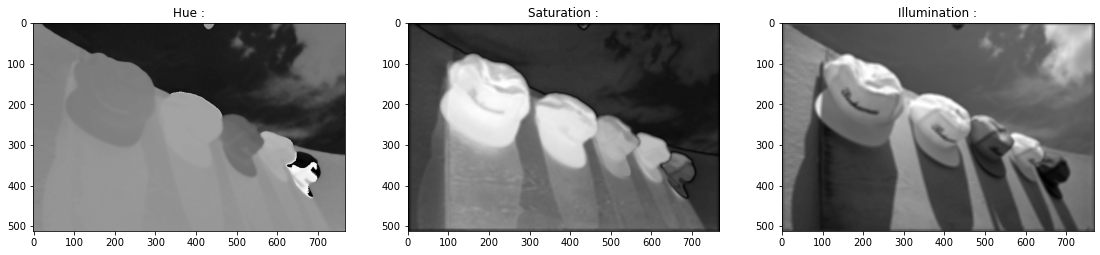

In [724]:
img_hsi = cv2.cvtColor(img_blur, cv2.COLOR_BGR2HSV)
h = img_hsi[:,:,0]
s = img_hsi[:,:,1]
i = img_hsi[:,:,2]

plt.figure(figsize=(19,19))
plt.subplot(1,3,1)
plt.imshow(h,cmap='gray')
plt.title('Hue :')

plt.subplot(1,3,2)
plt.imshow(s,cmap='gray')
plt.title('Saturation :')

plt.subplot(1,3,3)
plt.imshow(i,cmap='gray')
plt.title('Illumination :');

#### For each hat I got the hue and saturation from a window around the hat and made the mask from a threshold of dh and saturations more than the hat it self, in the end I multiplied the mask to the image.

In [725]:
dh = 5
hy = np.mean(h[100:240,120:260]) #hue yellow
sy = np.mean(s[100:240,120:260])/1.4
print('Hue (yellow hat) :',hy, sy)
yellow = np.zeros(h.shape)
yellow[h>hy-dh] = 1
yellow[h>hy+dh] = 0
yellow[s<sy] = 0

yhat = img.copy()
yhat[:,:,0] = img[:,:,0]*yellow
yhat[:,:,1] = img[:,:,1]*yellow
yhat[:,:,2] = img[:,:,2]*yellow


dh = 3
ho = np.mean(h[190:290,330:430]) #hue orange
so = np.mean(s[190:290,330:430])/1.3
print('Hue (orange hat) :',ho, so)
orange = np.zeros(h.shape)
orange[h>ho-dh] = 1
orange[h>ho+dh] = 0
orange[s<so] = 0

ohat = img.copy()
ohat[:,:,0] = img[:,:,0]*orange
ohat[:,:,1] = img[:,:,1]*orange
ohat[:,:,2] = img[:,:,2]*orange


dh = 9
hg = np.mean(h[250:320,470:540]) #hue green
sg = np.mean(s[250:320,470:540])/1.5
print('Hue (green hat) :',hg, sg)
green = np.zeros(h.shape)
green[h>hg-dh] = 1
green[h>hg+dh] = 0
green[s<sg] = 0

ghat = img.copy()
ghat[:,:,0] = img[:,:,0]*green
ghat[:,:,1] = img[:,:,1]*green
ghat[:,:,2] = img[:,:,2]*green


dh = 7
hp = np.mean(h[285:335,570:620]) #hue pink
sp = np.mean(s[285:335,570:620])/1.8
print('Hue (pink hat) :',hp, sp)
pink = np.zeros(h.shape)
pink[h>hp-dh] = 1
pink[h>hp+dh] = 0
pink[s<sp] = 0

phat = img.copy()
phat[:,:,0] = img[:,:,0]*pink
phat[:,:,1] = img[:,:,1]*pink
phat[:,:,2] = img[:,:,2]*pink


dh = 14
#hb = np.mean(h[350:390,650:700]) #hue blue
hb = 0
sb = np.mean(s[350:390,650:700])/1.7
print('Hue (blue hat) :',hb, sb, h[376,670])
blue = np.zeros(h.shape)
blue[h<hb+dh] = 1
blue[s<sb] = 0
hb = 150
blue[h>hb-dh] = 1

bhat = img.copy()
bhat[:,:,0] = img[:,:,0]*blue
bhat[:,:,1] = img[:,:,1]*blue
bhat[:,:,2] = img[:,:,2]*blue


Hue (yellow hat) : 88.49188775510204 163.79923469387757
Hue (orange hat) : 113.9812 169.67323076923077
Hue (green hat) : 76.26530612244898 115.62421768707482
Hue (pink hat) : 122.5128 102.17822222222223
Hue (blue hat) : 0 42.77852941176471 169


#### Results of HSV :

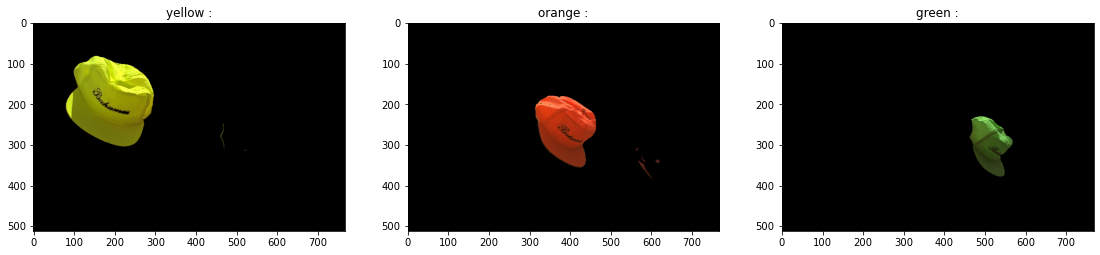

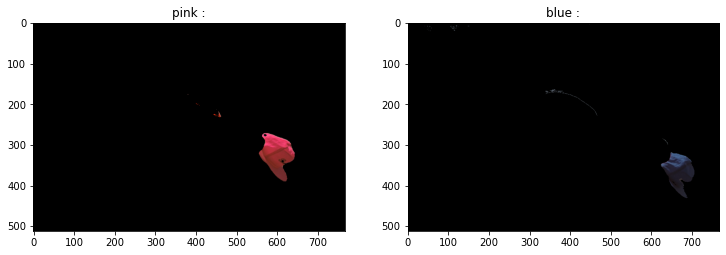

In [848]:
plt.figure(figsize=(19,10))
plt.subplot(2,3,1)
plt.imshow(yhat,cmap='gray')
plt.title('yellow :')

plt.subplot(2,3,2)
plt.imshow(ohat,cmap='gray')
plt.title('orange :')

plt.subplot(2,3,3)
plt.imshow(ghat,cmap='gray')
plt.title('green :');

plt.figure(figsize=(19,16))
plt.subplot(2,3,4)
plt.imshow(phat,cmap='gray')
plt.title('pink :')

plt.subplot(2,3,5)
plt.imshow(bhat,cmap='gray')
plt.title('blue :');

## RGB

#### Also here I blured both the RGB images and also the final mask for better results

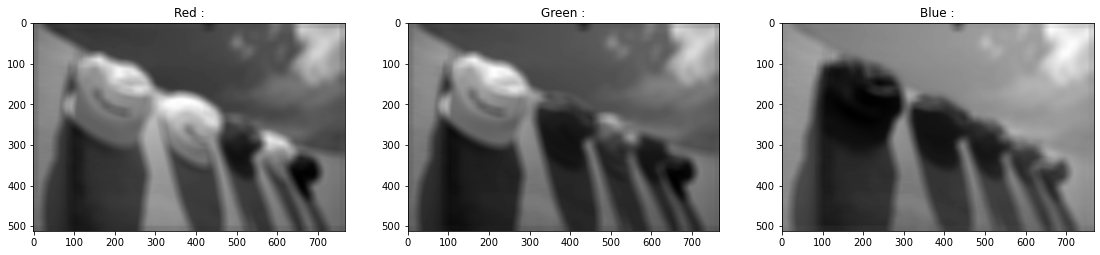

In [849]:
blur = (25,25)
img_blur = cv2.blur(img,ksize=blur)

R = img_blur[:,:,0]
G = img_blur[:,:,1]
B = img_blur[:,:,2]

#iio.imwrite("red.png",R)
#iio.imwrite("green.png",G)
#iio.imwrite("blue.png",B)

plt.figure(figsize=(19,19))
plt.subplot(1,3,1)
plt.imshow(R,cmap='gray')
plt.title('Red :')

plt.subplot(1,3,2)
plt.imshow(G,cmap='gray')
plt.title('Green :')

plt.subplot(1,3,3)
plt.imshow(B,cmap='gray')
plt.title('Blue :');

#### Function below just returnes the mask of image with colors around "color" in the rectangle 2dr, 2dg, 2db

In [851]:
def get_color(img, color, dr, dg, db):
    r, g, b = color
    img_blur = cv2.blur(img,ksize=(15,15))
    R, G, B = img_blur[:,:,0], img_blur[:,:,1], img_blur[:,:,2]
    m, n, c = img.shape
    
    out = img.copy()
    #masks
    red = np.zeros((m,n))
    red[R>r-dr] = 1
    red[R>r+dr] = 0
    
    green = np.zeros((m,n))
    green[G>g-dg] = 1
    green[G>g+dg] = 0
    
    
    blue = np.zeros((m,n))
    blue[B>b-db] = 1
    blue[B>b+db] = 0
    
    mask = np.zeros((m,n))
    mask = red*green*blue
    out[:,:,0] = out[:,:,0]*mask
    out[:,:,1] = out[:,:,1]*mask
    out[:,:,2] = out[:,:,2]*mask
    
    return mask

#### For each hat i got at least two rgb sets and added them together to get the final mask and afterwards I filtered the mask with simple mean filter with the window of size13 for making the mask more solid and getting rid of unwnted selections.

In [841]:
#yellow
ymask = np.logical_or(get_color(img,(133,132,12),75,55,15),
                      get_color(img,(205,220,40),55,65,35))
ymask = cv2.blur(ymask.astype('uint8'),ksize=(13,13))
ymask = cv2.blur(ymask,ksize=(13,13))
yhat2 = img.copy()
yhat2[:,:,0] = yhat2[:,:,0]*ymask
yhat2[:,:,1] = yhat2[:,:,1]*ymask
yhat2[:,:,2] = yhat2[:,:,2]*ymask

#orange
omask = np.logical_or(get_color(img,(148,46,16),52,35,14),
                      get_color(img,(205,83,47),50,35,30))
omask = cv2.blur(omask.astype('uint8'),ksize=(13,13))
omask = cv2.blur(omask,ksize=(13,13))
omask = cv2.blur(omask,ksize=(13,13))
ohat2 = img.copy()
ohat2[:,:,0] = ohat2[:,:,0]*omask
ohat2[:,:,1] = ohat2[:,:,1]*omask
ohat2[:,:,2] = ohat2[:,:,2]*omask

#green
gmask = np.logical_or(get_color(img,(53,65,22),14,19,14),
                      get_color(img,(87,150,50),22,50,35))
gmask = np.logical_or(gmask,get_color(img,(150,200,109),20,40,20))
gmask = cv2.blur(gmask.astype('uint8'),ksize=(13,13))
gmask = cv2.blur(gmask,ksize=(13,13))
gmask = cv2.blur(gmask,ksize=(13,13))
gmask = cv2.blur(gmask,ksize=(13,13))

ghat2 = img.copy()
ghat2[:,:,0] = ghat2[:,:,0]*gmask
ghat2[:,:,1] = ghat2[:,:,1]*gmask
ghat2[:,:,2] = ghat2[:,:,2]*gmask

#pink
pmask = np.logical_or(get_color(img,(125,46,37),30,20,10),
                      get_color(img,(179,51,65),40,30,15))
pmask = np.logical_or(pmask,get_color(img,(200,70,90),40,40,25))
pmask = cv2.blur(pmask.astype('uint8'),ksize=(13,13))
pmask = cv2.blur(pmask,ksize=(13,13))
phat2 = img.copy()
phat2[:,:,0] = phat2[:,:,0]*pmask
phat2[:,:,1] = phat2[:,:,1]*pmask
phat2[:,:,2] = phat2[:,:,2]*pmask

#blue
bmask = np.logical_or(get_color(img,(30,30,42),12,35,54),
                      get_color(img,(50,55,75),11,25,40))
bmask = cv2.blur(bmask.astype('uint8'),ksize=(13,13))
bmask = cv2.blur(bmask,ksize=(13,13))
bhat2 = img.copy()
bhat2[:,:,0] = bhat2[:,:,0]*bmask
bhat2[:,:,1] = bhat2[:,:,1]*bmask
bhat2[:,:,2] = bhat2[:,:,2]*bmask

#### Resualts of RGB

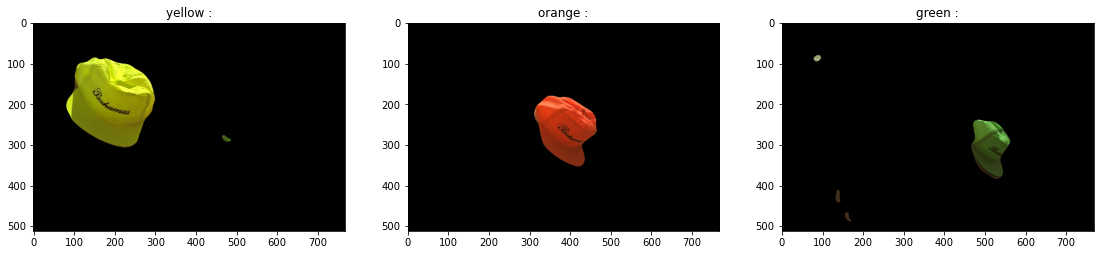

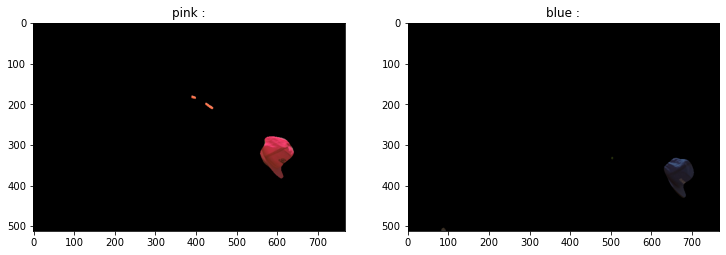

In [852]:
plt.figure(figsize=(19,10))
plt.subplot(2,3,1)
plt.imshow(yhat2,cmap='gray')
plt.title('yellow :')

plt.subplot(2,3,2)
plt.imshow(ohat2,cmap='gray')
plt.title('orange :')

plt.subplot(2,3,3)
plt.imshow(ghat2,cmap='gray')
plt.title('green :');

plt.figure(figsize=(19,16))
plt.subplot(2,3,4)
plt.imshow(phat2,cmap='gray')
plt.title('pink :')

plt.subplot(2,3,5)
plt.imshow(bhat2,cmap='gray')
plt.title('blue :');

## Part 3:

<h5>
    Obviously the HSV method performed better because it makes the mask based on the color no matter how dark it, on the other hand if your hat was in the same color but in the shadow the RGB detection wouldn't gets the color and you should make a mask so difficult and in the end resaults of RGB was ridiculous. 